<a href="https://colab.research.google.com/github/patil020/patil020/blob/master/commodity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas_datareader import data as web
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
import seaborn as sns
# Load the uploaded datasetA
file_path = '/content/small.xlsx'
data = pd.read_excel(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date of Auction          4691 non-null   datetime64[ns]
 1   Auctioneer               4691 non-null   object        
 2   No.of Lots               4691 non-null   int64         
 3   Total Qty Arrived (Kgs)  4691 non-null   float64       
 4   Qty Sold (Kgs)           4691 non-null   float64       
 5   MaxPrice (Rs./Kg)        4691 non-null   float64       
 6   Avg.Price (Rs./Kg)       4691 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 256.7+ KB


(None,
   Date of Auction                                         Auctioneer  \
 0      2024-10-16  THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...   
 1      2024-10-16      SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd   
 2      2024-10-15        Header Systems (India) Limited, Nedumkandam   
 3      2024-10-15                 Spice More Trading Company, Kumily   
 4      2024-10-14                       Mas Enterprises, Vandanmettu   
 
    No.of Lots  Total Qty Arrived (Kgs)  Qty Sold (Kgs)  MaxPrice (Rs./Kg)  \
 0         233                  73776.0         72794.0             2625.0   
 1         258                  64436.4         63937.9             2906.0   
 2         178                  42531.2         41859.0             3236.0   
 3         165                  48852.8         48852.8             2550.0   
 4         322                 103870.4        103748.9             2966.0   
 
    Avg.Price (Rs./Kg)  
 0             2273.71  
 1             2258.94  
 2      

In [ ]:
#data Pre-Processing

In [ ]:
data.shape

(4691, 7)

In [ ]:
#summary of data
data.describe(include="all")

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
count,4691,4691,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000
unique,NaN,19,NaN,NaN,NaN,NaN,NaN
top,NaN,"Mas Enterprises, Vandanmettu",NaN,NaN,NaN,NaN,NaN
freq,NaN,411,NaN,NaN,NaN,NaN,NaN
mean,2020-02-15 20:59:48.488595200,NaN,226.704327,51518.911469,49190.972628,1793.664251,1358.803323
min,2014-11-07 00:00:00,NaN,11.000000,2296.900000,0.000000,0.000000,0.000000
25%,2017-06-29 00:00:00,NaN,165.000000,31234.050000,29505.300000,1235.000000,896.075000
50%,2020-01-13 00:00:00,NaN,219.000000,50154.300000,47552.900000,1504.000000,1098.930000
75%,2022-09-30 12:00:00,NaN,271.000000,67704.600000,64775.750000,2182.500000,1585.140000
max,2024-10-16 00:00:00,NaN,790.000000,210080.000000,511177.000000,7000.000000,4733.190000


In [ ]:
data.isnull().sum()

,0
Date of Auction,0
Auctioneer,0
No.of Lots,0
Total Qty Arrived (Kgs),0
Qty Sold (Kgs),0
MaxPrice (Rs./Kg),0
Avg.Price (Rs./Kg),0


In [ ]:
#checking for duplicates
duplicates=data.duplicated().sum()
print("Number of duplicates:",duplicates)

Number of duplicates: 6


In [ ]:
#  display the duplicate rows (if any)
if duplicates > 0:
    print(data[data.duplicated()])

# Remove duplicate rows ()
data = data.drop_duplicates()

# Verify removal of duplicates
print("Number of duplicates after removal:", data.duplicated().sum())

     Date of Auction                                         Auctioneer  \
66        2024-09-03     South Indian Green Cardamom Company Ltd, Kochi   
227       2024-05-18    IDUKKI MAHILA CARDAMOM PRODUCER COMPANY LIMITED   
4454      2015-10-28      SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd   
4474      2015-10-15  THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...   
4607      2015-06-20           Green House Cardamom Mktg.India Pvt. Ltd   
4608      2015-06-20                       Mas Enterprises, Vandanmettu   

      No.of Lots  Total Qty Arrived (Kgs)  Qty Sold (Kgs)  MaxPrice (Rs./Kg)  \
66           226                  51831.4         50135.8             2600.0   
227          129                  29815.2         29094.9             3804.0   
4454         196                  35674.0         35464.0              876.0   
4474         310                  86807.0         86807.0              926.0   
4607         185                  22871.0         22823.0              860

In [ ]:
#count of Auctioneer
data['Auctioneer'].value_counts()

,count
Auctioneer,
"Mas Enterprises, Vandanmettu",410
"South Indian Green Cardamom Company Ltd, Kochi",406
"Header Systems (India) Limited, Nedumkandam",403
"The Kerala Cardamom Processing and Marketing Company Limited, Thekkady",391
Green House Cardamom Mktg.India Pvt. Ltd,390
IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd,389
SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,389
CARDAMOM GROWERSFOREVER PRIVATE LIMITED,371
"Cardamom Planters' Association, Santhanpara",332


In [ ]:
#drop multiple price rows for smae days ,due to differnt pricings at multiple auctioneers
data1=data.drop_duplicates(subset=['Date of Auction','Total Qty Arrived (Kgs)','Qty Sold (Kgs)','MaxPrice (Rs./Kg)','Avg.Price (Rs./Kg)'],keep='first')

In [ ]:
data1.shape

(4685, 7)

In [ ]:
#now we have clean dataset with unique price values for each date commencing ............

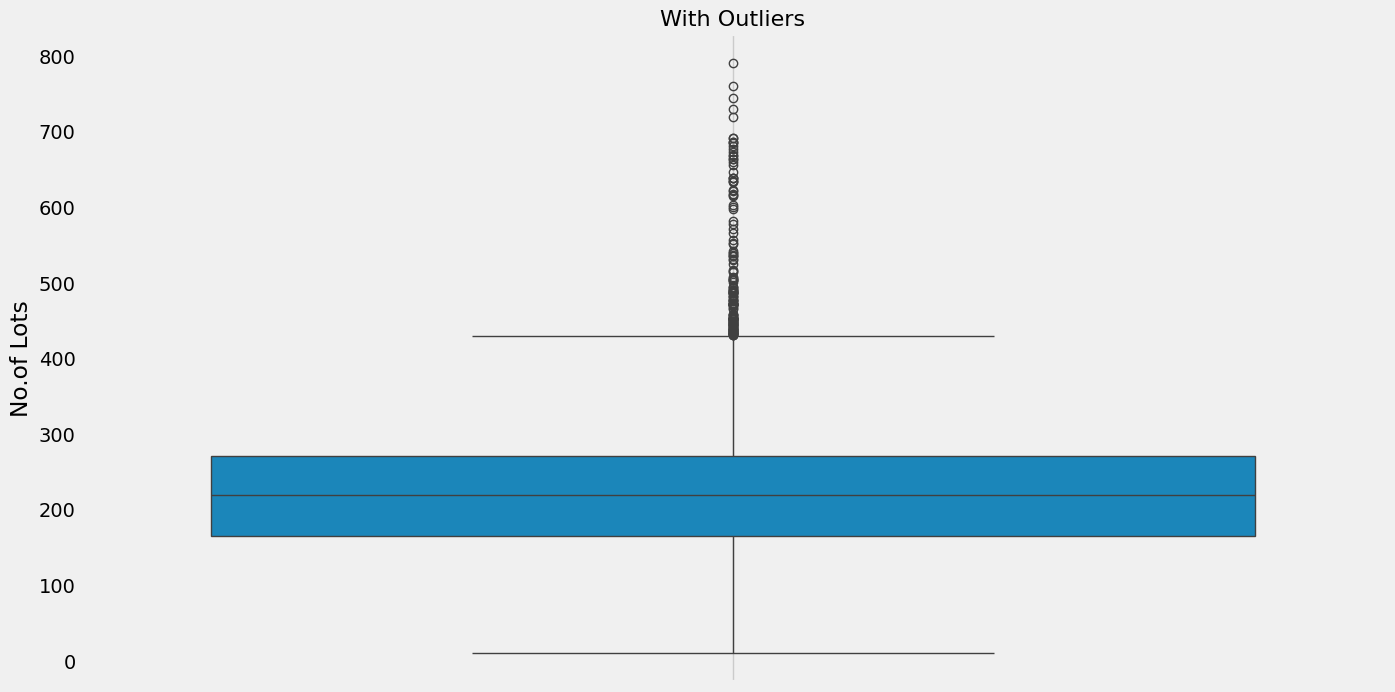

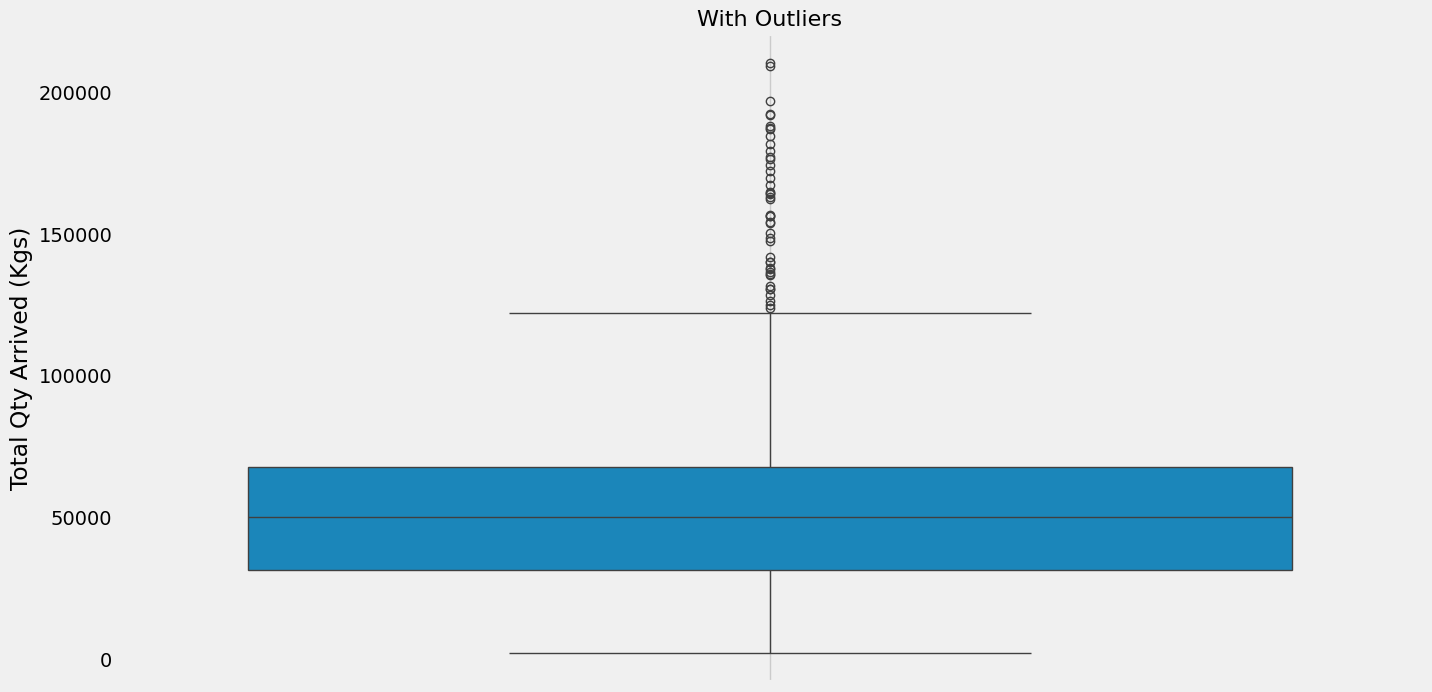

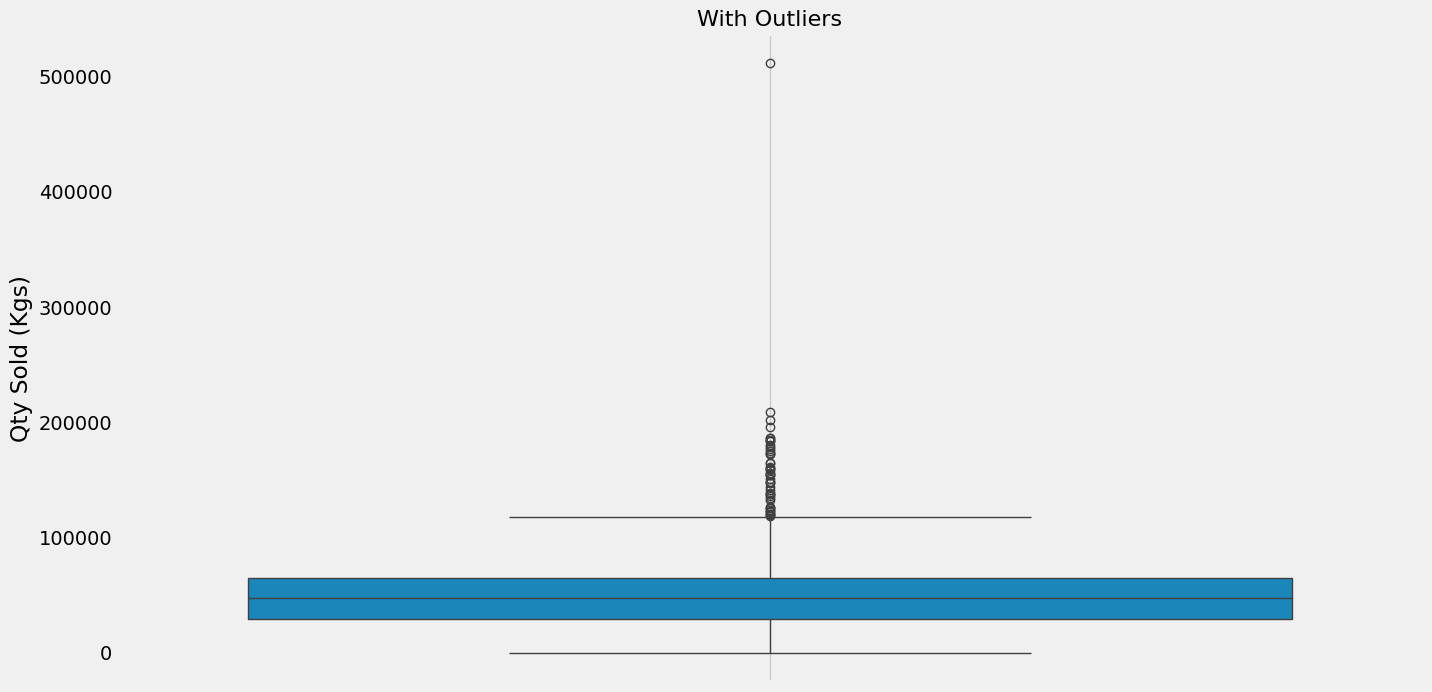

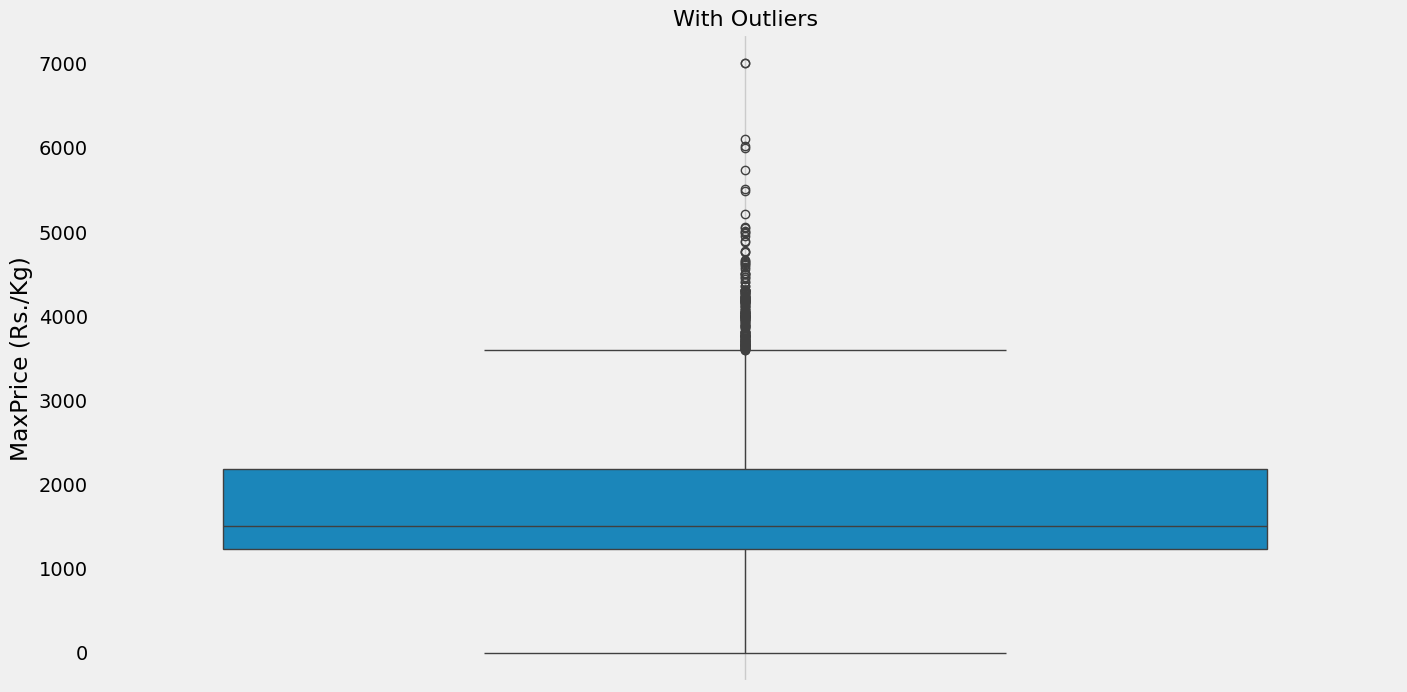

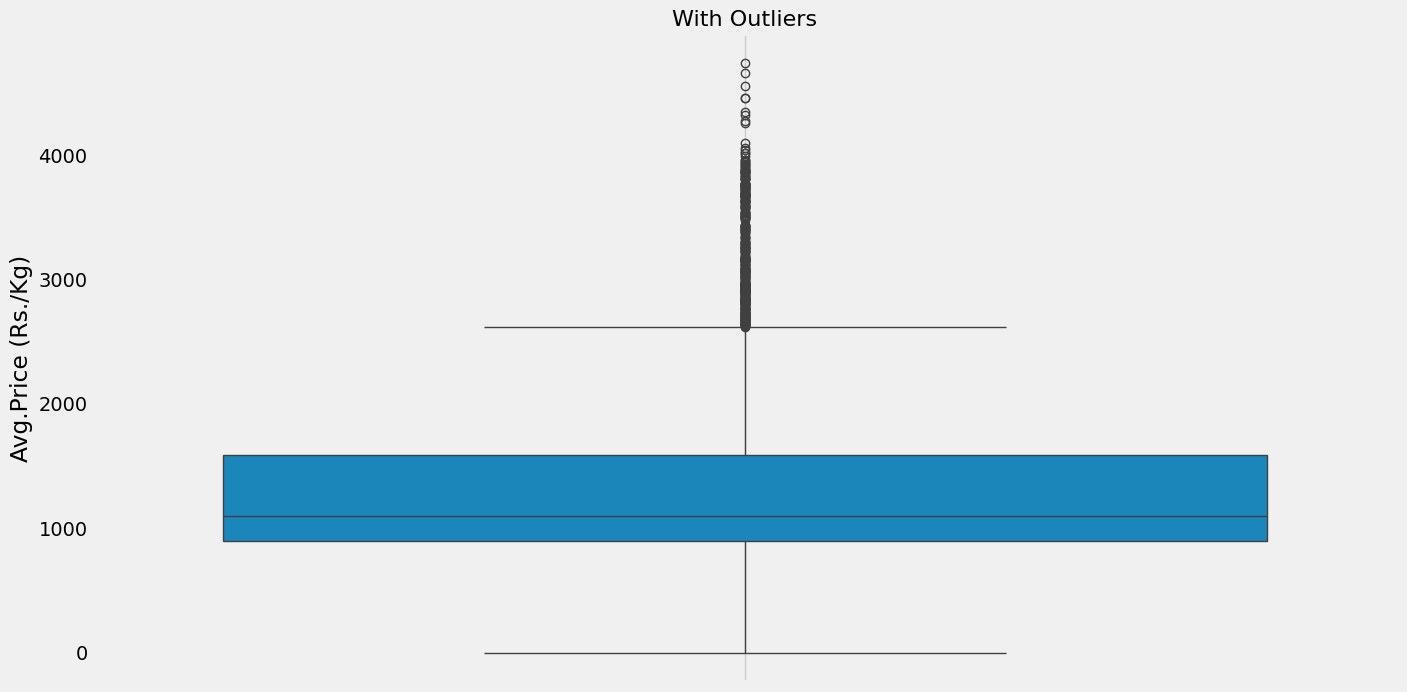

In [ ]:
#checking for outliers
cols=['No.of Lots','Total Qty Arrived (Kgs)','Qty Sold (Kgs)','MaxPrice (Rs./Kg)','Avg.Price (Rs./Kg)']
for i in cols:
    sns.boxplot(data1[i],whis=1.5)
    plt.grid()
    plt.title('With Outliers',fontsize=16)
    plt.show();

import seaborn as sns


cols = ['No.of Lots', 'Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)',
        'MaxPrice (Rs./Kg)', 'Avg.Price (Rs./Kg)']

# Generate horizontal boxplots for each column
for i in cols:
    plt.figure()  # Adjust the figure size
    sns.boxplot(x=data1[i])  # Horizontal boxplot using 'x' argument
    plt.grid(True)
    plt.title(f'Horizontal Boxplot - {i}', fontsize=16)
    plt.yticks([])  # Remove y-axis labels if unnecessary
    plt.show()


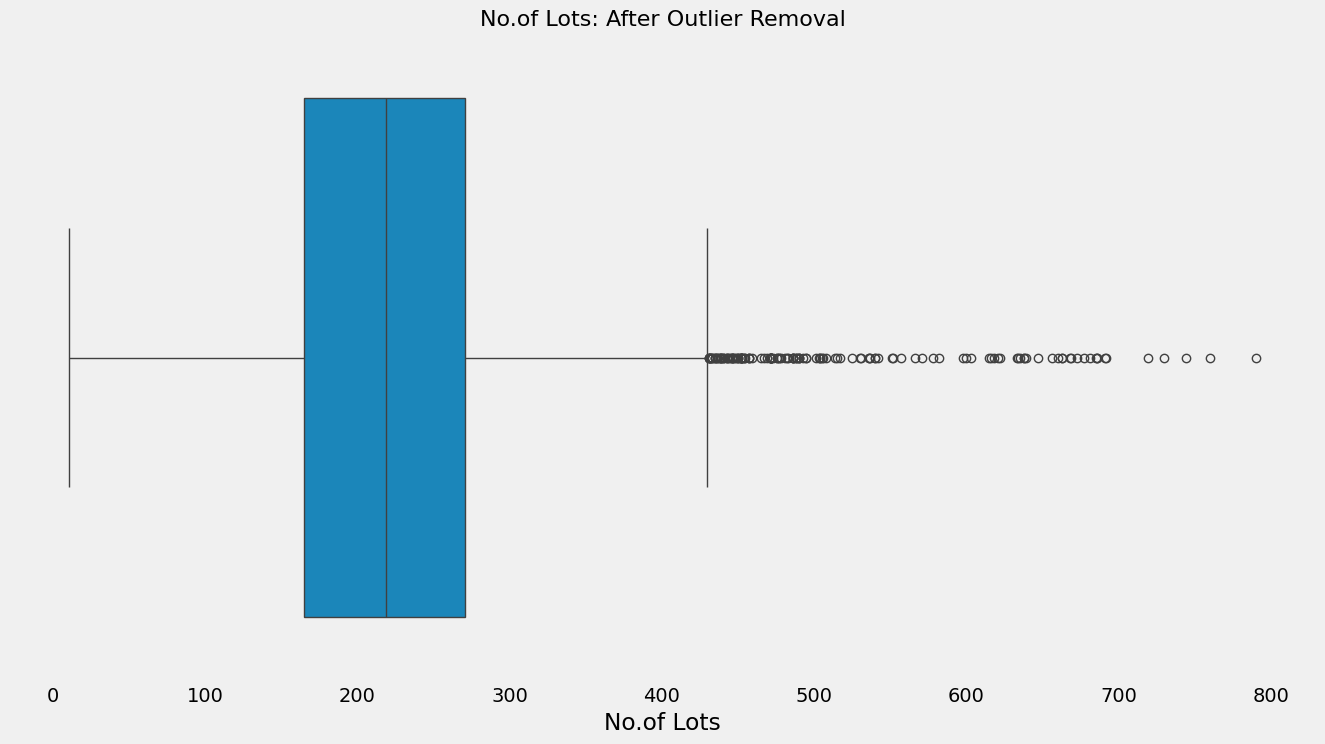

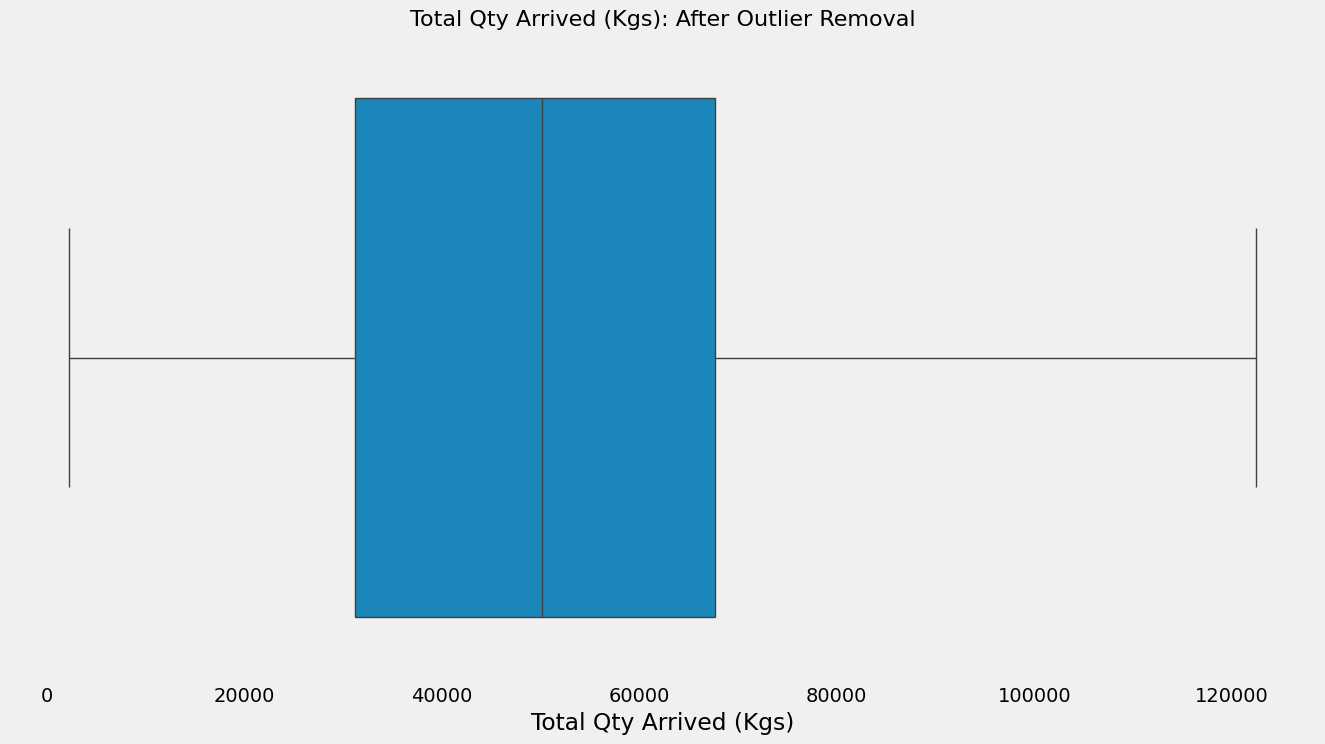

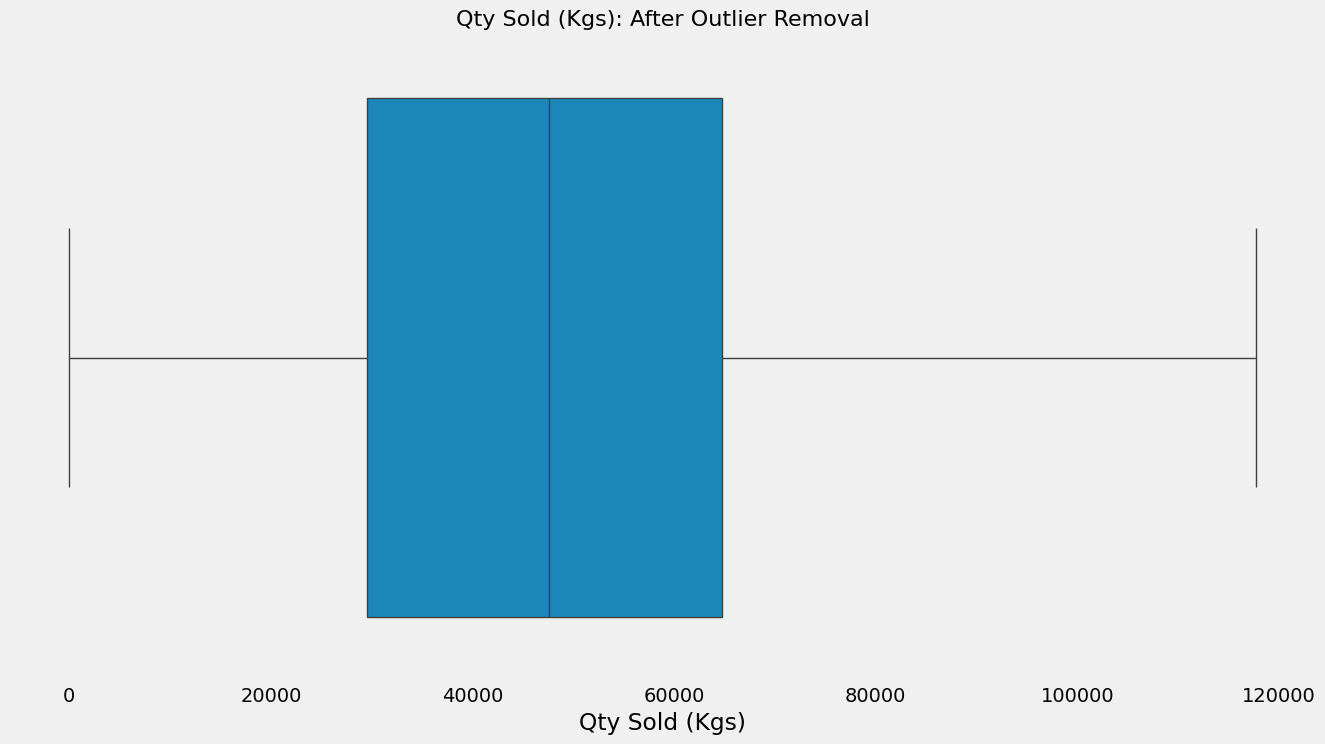

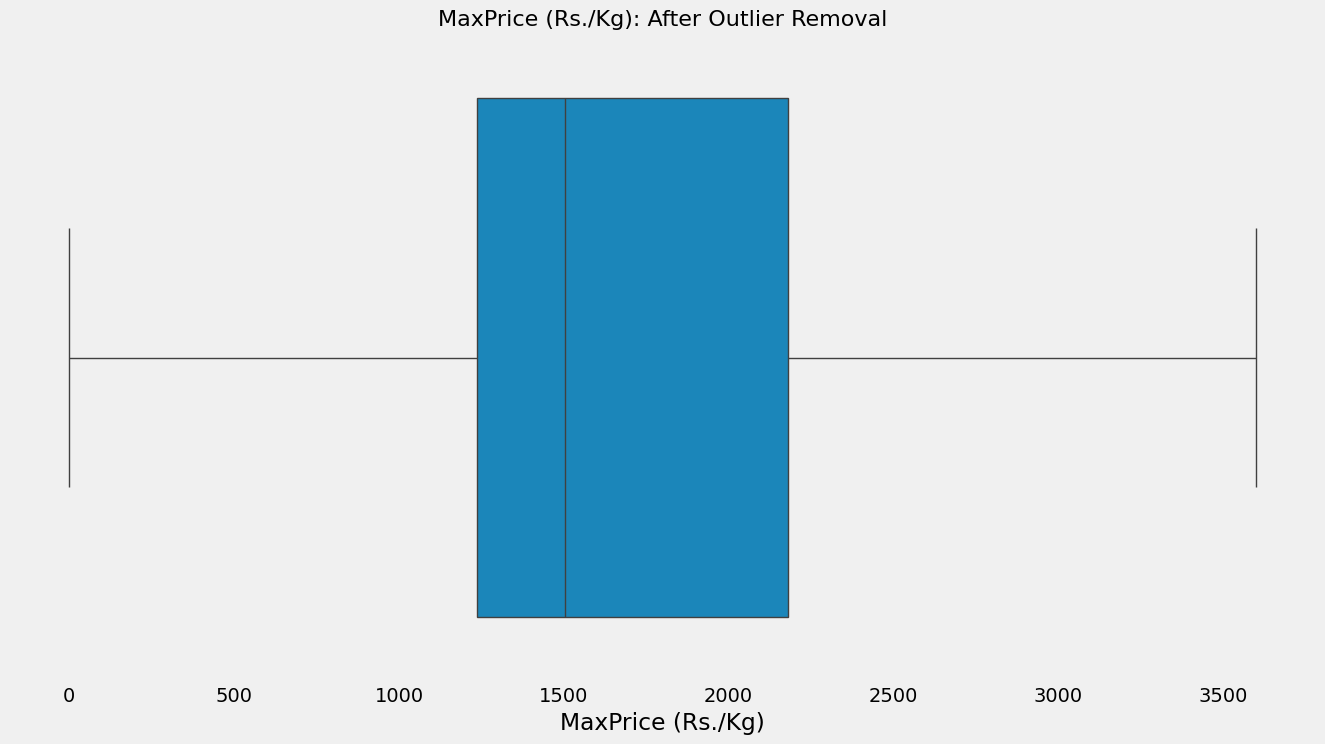

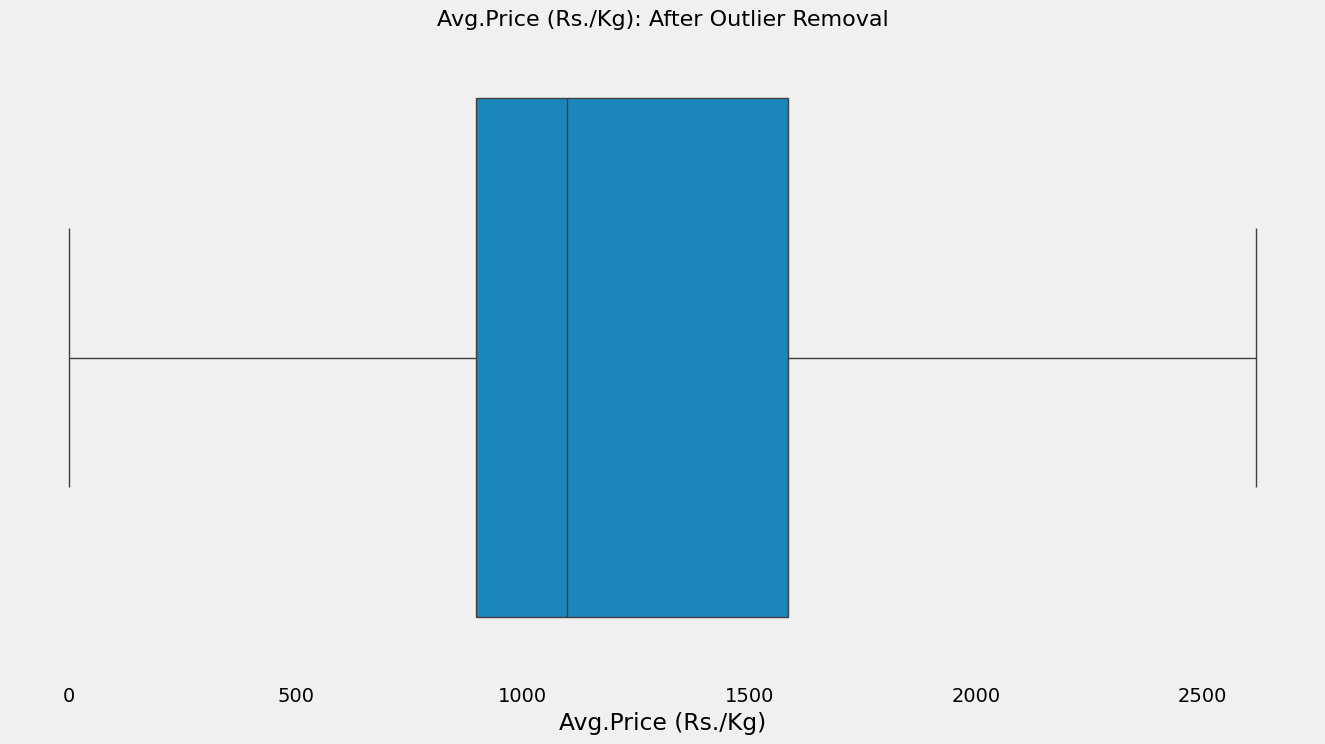

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the outlier boundaries
def remove_outlier(col):
    sorted_col = np.sort(col)  # Sort the column
    Q1, Q3 = np.percentile(sorted_col, [25, 75])  # Calculate 1st and 3rd quartiles
    IQR = Q3 - Q1  # Interquartile range
    lower_range = Q1 - (1.5 * IQR)  # Lower bound for outliers
    upper_range = Q3 + (1.5 * IQR)  # Upper bound for outliers
    return lower_range, upper_range  # Return the boundaries

# Apply outlier removal to specific columns
cols = ['No.of Lots', 'Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)', 'MaxPrice (Rs./Kg)', 'Avg.Price (Rs./Kg)']

for column in cols:
    if data1[column].dtype == 'float64':  # Check if the column is of float type
        lr, ur = remove_outlier(data1[column])  # Get outlier bounds
        # Replace outliers
        data1[column] = np.where(data1[column] > ur, ur, data1[column])
        data1[column] = np.where(data1[column] < lr, lr, data1[column])

# Plotting boxplots after removing outliers
for i in cols:
    sns.boxplot(x=data1[i], whis=1.5)  # Plot boxplot
    plt.grid()
    plt.title(f'{i}: After Outlier Removal', fontsize=16)  # Dynamic title based on column name
    plt.yticks([])  # Remove y-axis ticks if not needed
    plt.show()  # Display the plot


In [ ]:
data1.head()

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
0,2024-10-16,THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE S...,233,73776.0,72794.0,2625.0,2273.71
1,2024-10-16,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,258,64436.4,63937.9,2906.0,2258.94
2,2024-10-15,"Header Systems (India) Limited, Nedumkandam",178,42531.2,41859.0,3236.0,2271.60
3,2024-10-15,"Spice More Trading Company, Kumily",165,48852.8,48852.8,2550.0,2307.54
4,2024-10-14,"Mas Enterprises, Vandanmettu",322,103870.4,103748.9,2966.0,2283.15


In [ ]:
from datetime import datetime

# Define the date as a string
date_str1 = '05-Oct-24'

# Convert the string to a datetime object
date_dt1 = datetime.strptime(date_str1, '%d-%b-%y')

# Print the converted datetime object
print(date_dt1)


2024-10-05 00:00:00


In [ ]:
# Convert the relevant columns to numeric types and parse the 'Date of Auction' column to datetime
data['Date of Auction'] = pd.to_datetime(data['Date of Auction'], format='%d-%m-%Y')

# Convert 'Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)', 'MaxPrice (Rs./Kg)', and 'Avg.Price (Rs./Kg)' to numeric, handling any non-numeric values
columns_to_convert = ['Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)', 'MaxPrice (Rs./Kg)', 'Avg.Price (Rs./Kg)']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Check for any missing or unusual data after conversion
missing_data_summary = data.isnull().sum()

data.dtypes, missing_data_summary.head()  # Check new data types and missing values


(Date of Auction            datetime64[ns]
 Auctioneer                         object
 No.of Lots                          int64
 Total Qty Arrived (Kgs)           float64
 Qty Sold (Kgs)                    float64
 MaxPrice (Rs./Kg)                 float64
 Avg.Price (Rs./Kg)                float64
 dtype: object,
 Date of Auction            0
 Auctioneer                 0
 No.of Lots                 0
 Total Qty Arrived (Kgs)    0
 Qty Sold (Kgs)             0
 dtype: int64)

In [ ]:
# Step 1: Inspect the first few values in the 'Date of Auction' column
#print(data1['Date of Auction'].head(10))

# Step 2: Attempt to convert to datetime and handle errors
#data1['Date of Auction'] = pd.to_datetime(data1['Date of Auction'], errors='coerce')

# Step 3: Identify how many rows failed to convert
#print("Number of NaT values:", data1['Date of Auction'].isna().sum())

# Step 4: Drop rows with NaT values
#data1 = data1.dropna(subset=['Date of Auction'])

# Step 5: Verify the cleaned data
#print(data1.info())




In [ ]:
#sorting the  data set by date
sorted_df = data1. sort_values(by=["Date of Auction"], ascending=True)
sorted_df

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
4690,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
4689,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
4687,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
4688,2015-05-01,STATE TRADING CORPORATION,121,20836.0,20623.0,928.0,719.43
4685,2015-05-02,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
...,...,...,...,...,...,...,...
4,2024-10-14,"Mas Enterprises, Vandanmettu",322,103870.4,103748.9,2966.0,2283.15
3,2024-10-15,"Spice More Trading Company, Kumily",165,48852.8,48852.8,2550.0,2307.54
2,2024-10-15,"Header Systems (India) Limited, Nedumkandam",178,42531.2,41859.0,3236.0,2271.60
1,2024-10-16,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,258,64436.4,63937.9,2906.0,2258.94


In [ ]:
# set the index to be the date
df2=sorted_df.set_index(pd.DatetimeIndex(sorted_df["Date of Auction"].values))
#show the data
df2

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
2014-11-07,2014-11-07,"South Indian Green Cardamom Company Ltd, Kochi",477,109975.0,109076.0,958.0,765.73
2015-01-14,2015-01-14,The Cardamom Processing & Marketing Co-Operati...,350,76699.0,76699.0,1130.0,861.93
2015-05-01,2015-05-01,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,82,10281.0,10132.0,916.0,680.56
2015-05-01,2015-05-01,STATE TRADING CORPORATION,121,20836.0,20623.0,928.0,719.43
2015-05-02,2015-05-02,Green House Cardamom Mktg.India Pvt. Ltd,211,28950.0,27568.0,846.0,655.47
...,...,...,...,...,...,...,...
2024-10-14,2024-10-14,"Mas Enterprises, Vandanmettu",322,103870.4,103748.9,2966.0,2283.15
2024-10-15,2024-10-15,"Spice More Trading Company, Kumily",165,48852.8,48852.8,2550.0,2307.54
2024-10-15,2024-10-15,"Header Systems (India) Limited, Nedumkandam",178,42531.2,41859.0,3236.0,2271.60
2024-10-16,2024-10-16,SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd,258,64436.4,63937.9,2906.0,2258.94


In [ ]:
#now get only the average price
#df3=df2[['Avg.Price (Rs./Kg)']]
#df3
df3 = df2[['Date of Auction', 'Avg.Price (Rs./Kg)']]

Contents of df3:
           Date of Auction  Avg.Price (Rs./Kg)
2014-11-07      2014-11-07              765.73
2015-01-14      2015-01-14              861.93
2015-05-01      2015-05-01              680.56
2015-05-01      2015-05-01              719.43
2015-05-02      2015-05-02              655.47

Data types in df3:
Date of Auction       datetime64[ns]
Avg.Price (Rs./Kg)           float64
dtype: object

Number of NaN values in df3:
Date of Auction       0
Avg.Price (Rs./Kg)    0
dtype: int64

Data types after conversion:
Date of Auction       datetime64[ns]
Avg.Price (Rs./Kg)           float64
dtype: object


<ipython-input-135-407f171f1770>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Avg.Price (Rs./Kg)'] = pd.to_numeric(df3['Avg.Price (Rs./Kg)'], errors='coerce')
<ipython-input-135-407f171f1770>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)  # Drop any rows with NaN values


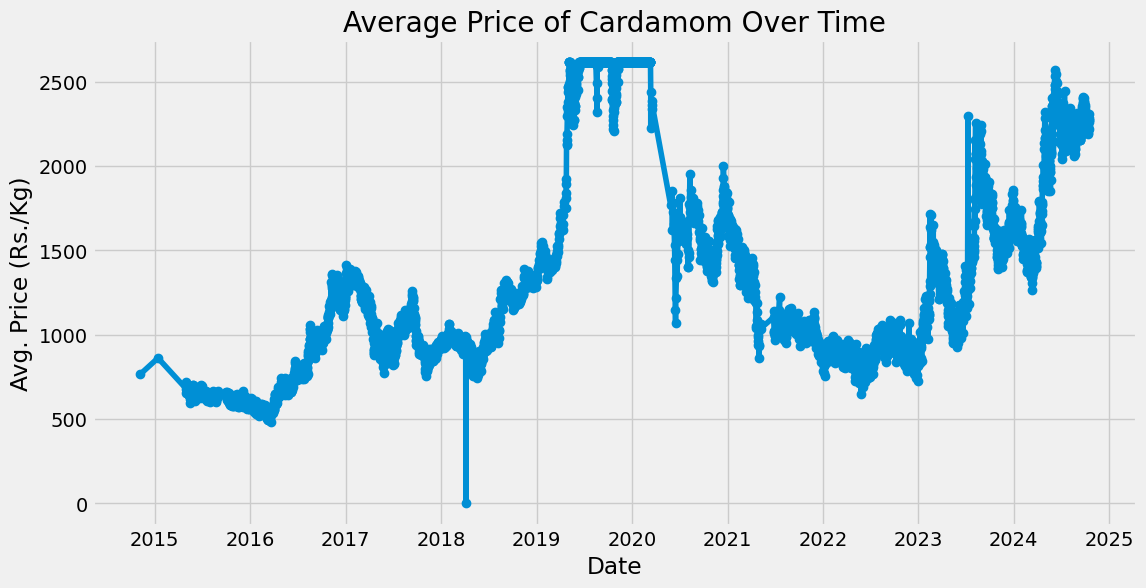

In [ ]:
# Step 1: Inspect the DataFrame
print("Contents of df3:")
print(df3.head())  # Display the first few rows
print("\nData types in df3:")
print(df3.dtypes)  # Check data types

# Step 2: Check for NaN values
print("\nNumber of NaN values in df3:")
print(df3.isna().sum())  # Count NaN values in each column

# Step 3: Convert to Numeric Again (if necessary)
df3['Avg.Price (Rs./Kg)'] = pd.to_numeric(df3['Avg.Price (Rs./Kg)'], errors='coerce')
df3.dropna(inplace=True)  # Drop any rows with NaN values

# Verify after conversion
print("\nData types after conversion:")
print(df3.dtypes)

# Step 4: Set Date as Index and Plot
df3.set_index('Date of Auction', inplace=True)

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(df3['Avg.Price (Rs./Kg)'], marker='o')  # Ensure to specify the column for plotting
plt.title('Average Price of Cardamom Over Time')
plt.xlabel('Date')
plt.ylabel('Avg. Price (Rs./Kg)')
plt.grid(True)
plt.show()


In [ ]:
#We notice that there is an decreasing trend in the initial years (2015-16), then an increasing trend (2016-2017). From mid 2018 to mid 2020, the price peaks, thereafter the trend is decreasing. No seasonality can be established.

In [ ]:
# Monthly price across years
yearly_price_across_months=pd.pivot_table(df3, values="Avg.Price (Rs./Kg)", columns=df3.index.month, index= df3.index.year)
yearly_price_across_months
df3_filled = df3.fillna(method='ffill')  # Forward fill
df3_filled = df3.fillna(method='bfill')  # Backward fill


<ipython-input-137-da2e645e718a>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3_filled = df3.fillna(method='ffill')  # Forward fill
<ipython-input-137-da2e645e718a>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3_filled = df3.fillna(method='bfill')  # Backward fill


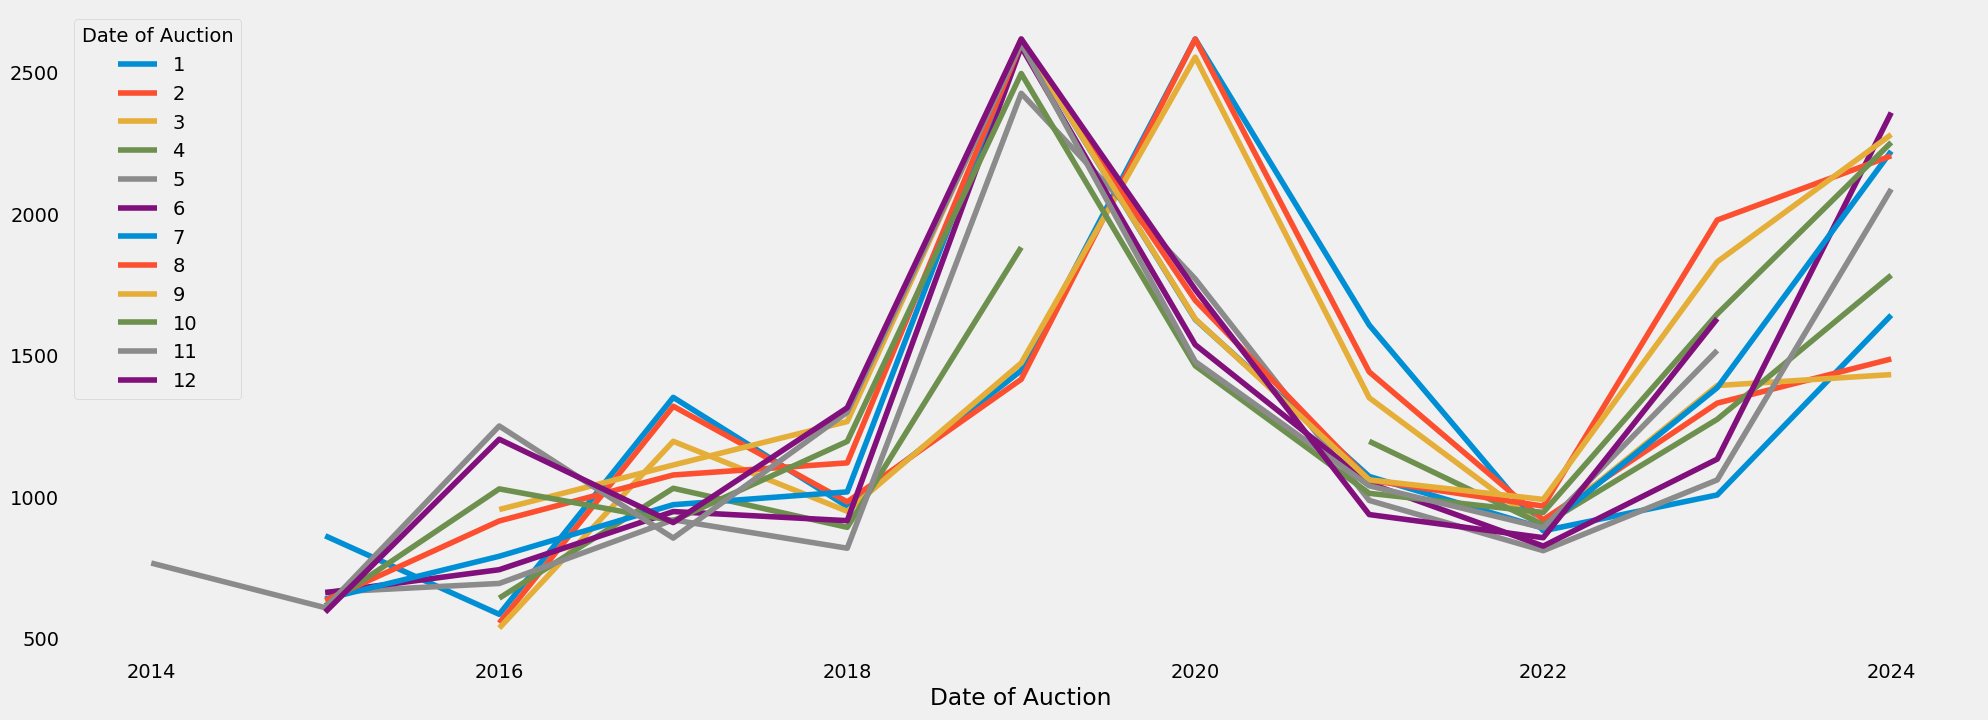

In [ ]:
#To plot Monthly price across years
fig, ax= plt.subplots(figsize=(22,8))
yearly_price_across_months.plot(ax=ax)
plt.grid();

In [ ]:
#Simple Exponential Smoothing¶

In [ ]:
# Importing the necessary packages
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

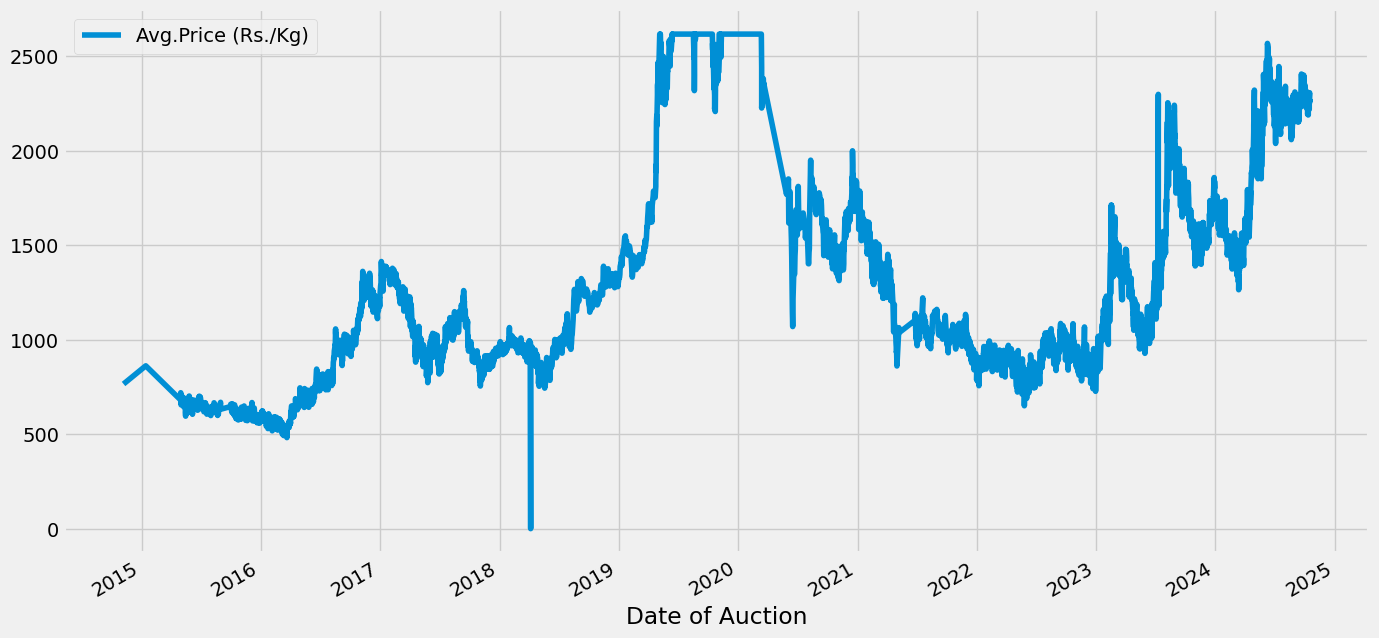

In [ ]:
rcParams['figure.figsize'] = 15,8
df3.plot(grid=True);

In [ ]:
#Split the data into training and test. The data from 2021 should be training data.
#train= df3[df3.index<'2024']
#test= df3[df3.index>'2024']
# Assume you already have train and test splits
# Assume you already have train and test splits using the index
train = df3[:int(len(df3) * 0.8)]  # First 80% for training
test = df3[int(len(df3) * 0.8):]  # Remaining 20% for testing



In [ ]:
# Printing the cardamom Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Avg.Price (Rs./Kg)
Date of Auction,
2014-11-07,765.73
2015-01-14,861.93
2015-05-01,680.56
2015-05-01,719.43
2015-05-02,655.47
...,...
2023-02-24,1551.94
2023-02-24,1453.07
2023-02-25,1535.52


Test Data


,Avg.Price (Rs./Kg)
Date of Auction,
2023-02-28,1483.49
2023-02-28,1532.41
2023-03-01,1500.33
2023-03-01,1393.97
2023-03-02,1520.71
...,...
2024-10-14,2283.15
2024-10-15,2307.54
2024-10-15,2271.60


In [ ]:
#Simple Exponential Smoothing with additive errors
# create class
model_SES = SimpleExpSmoothing(train)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [ ]:
## Let us check the parameters
model_SES_autofit.params

{'smoothing_level': 0.5584040579053968,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 765.73,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
3748,1509.348494
3749,1509.348494
3750,1509.348494
3751,1509.348494
3752,1509.348494
...,...
4680,1509.348494
4681,1509.348494
4682,1509.348494
4683,1509.348494


In [ ]:
## Mean Absolute Percentage Error (MAPE)
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [ ]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 447.2862405552035
SES RMSE (calculated using statsmodels): 447.2862405552038


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",447.286241


In [ ]:
#Double Exponential Smoothing

In [ ]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train)
# Fitting the model
model_DES = model_DES.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5707142857142856, 'smoothing_trend': 0.0713392857142857, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 765.73, 'initial_trend': 96.19999999999993, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,0
3748,1524.093555
3749,1531.432071
3750,1538.770586
3751,1546.109102
3752,1553.447618
...,...
4680,8363.590022
4681,8370.928538
4682,8378.267053
4683,8385.605569


In [ ]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 3662.91149234322


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Test RMSE
"Alpha=0.99,SES",447.286241
"Alpha=1,Beta=0.0189:DES",3662.911492


In [ ]:
# create a variable to store the number of days for which we want to predict the prices
prediction_days=30
# create a new variable called prediction
df3['prediction']=df3[['Avg.Price (Rs./Kg)']].shift(-prediction_days)
df3

<ipython-input-157-13d70e8122bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['prediction']=df3[['Avg.Price (Rs./Kg)']].shift(-prediction_days)


,Avg.Price (Rs./Kg),prediction
Date of Auction,,
2014-11-07,765.73,627.98
2015-01-14,861.93,653.84
2015-05-01,680.56,647.55
2015-05-01,719.43,660.18
2015-05-02,655.47,644.76
...,...,...
2024-10-14,2283.15,NaN
2024-10-15,2307.54,NaN
2024-10-15,2271.60,NaN


In [ ]:
# Drop the prediction variable from the dataframe
X = np.array(df3.drop('prediction', axis=1))
# Remove the last n+1 rows of data where, n is the prediction_days
X=X[:len(df3)-prediction_days]
print(X)

[[ 765.73]
 [ 861.93]
 [ 680.56]
 ...
 [2340.62]
 [2363.77]
 [2386.04]]


In [ ]:
# Create a dependent variable dataset (y)
y = np.array(df3['prediction'])
#Get all the y values except the last n+1 rows
y=y[:-prediction_days]
y

array([ 627.98,  653.84,  647.55, ..., 2271.6 , 2258.94, 2273.71])

In [ ]:
# set the prediction_days_array for the last 30 days from the original dataset
prediction_days_array=np.array(df3.drop(['prediction'], axis=1))[-prediction_days:]
print(prediction_days_array)

[[2338.68]
 [2353.6 ]
 [2400.76]
 [2359.47]
 [2317.78]
 [2323.81]
 [2350.56]
 [2277.18]
 [2285.15]
 [2300.44]
 [2231.85]
 [2318.9 ]
 [2265.41]
 [2270.83]
 [2273.16]
 [2251.57]
 [2238.49]
 [2217.7 ]
 [2212.01]
 [2192.59]
 [2238.48]
 [2210.78]
 [2189.73]
 [2215.46]
 [2219.37]
 [2283.15]
 [2307.54]
 [2271.6 ]
 [2258.94]
 [2273.71]]


In [ ]:
#Random forest regressor model

In [ ]:
#Split the data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=4, random_state=1)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9649194772719872

In [ ]:
model.score(X_test, y_test)
#As can be seen, the model is performing very well with a 86% accuracy on the test set

0.8698440363969444

In [ ]:
#Show how close the predicted values and actual values are
prediction=model.predict(X_test)
#print the predicted values
print(prediction)
print()
#print the actual values
print(y_test)

[1003.9325     1453.7975      604.15       1421.545      2528.17851737
 1820.28        869.8525      999.93        888.6075      625.7725
  840.1475     1451.725       595.9725     1499.275       641.31
 1021.8475     1139.2825     1800.6175      883.2625      634.44
  802.65       2179.6         991.575      1131.39        956.265
 1322.62       1763.64       1141.95       1688.3475      918.19
 2528.17851737 1124.2725      680.8075     2528.17851737 1314.195
 2528.17851737  991.18       1045.195       947.6325      896.2575
  932.8875     1002.08        897.7775      656.97        648.755
  878.59       1010.16        922.66       1012.9625      788.98
 2528.17851737 2528.17851737 1573.485      1011.3425     1372.22
  838.2125      659.9825      957.5625      856.49       1109.3725
  954.0075     1382.85       2139.8425     1727.72       1763.85
  887.66        968.4625     1762.58        885.1        2451.89
  764.15        649.43       1785.3675     1935.81        899.86
 2269.005 

In [ ]:
#Get model's prediction for the next 'n' days
prediction=model.predict(prediction_days_array)
#print the predicted values
print(prediction)
print()
#print the actual values
print(df3['Avg.Price (Rs./Kg)'].tail(prediction_days))

[2047.58    2298.85125 2534.01375 1851.37875 2254.80875 2229.805
 2405.1125  2237.86    2216.7875  2202.1675  2237.39    2470.62625
 2250.355   2617.635   2428.55    2292.7     2316.815   2292.7725
 2085.285   2213.8875  2316.815   2170.27    2154.785   2249.3875
 2303.3125  2216.7875  2489.07    2597.23    2245.335   2428.55   ]

Date of Auction
2024-09-26    2338.68
2024-09-27    2353.60
2024-09-27    2400.76
2024-09-28    2359.47
2024-09-28    2317.78
2024-09-30    2323.81
2024-09-30    2350.56
2024-10-01    2277.18
2024-10-01    2285.15
2024-10-03    2300.44
2024-10-03    2231.85
2024-10-04    2318.90
2024-10-04    2265.41
2024-10-05    2270.83
2024-10-05    2273.16
2024-10-07    2251.57
2024-10-08    2238.49
2024-10-08    2217.70
2024-10-09    2212.01
2024-10-09    2192.59
2024-10-10    2238.48
2024-10-10    2210.78
2024-10-11    2189.73
2024-10-11    2215.46
2024-10-14    2219.37
2024-10-14    2283.15
2024-10-15    2307.54
2024-10-15    2271.60
2024-10-16    2258.94
2024-10-16   

However as seen above it is clear from the model performance (accuracy@train = 94%; accuracy@test = 86%) that the random forest regressor model is a good model. However, trying out an additional model.

VARMAX (vector auto-regression)

VARMAX procedure estimates the model parameters and generates forecasts associated with vector autoregressive moving-average processes with exogenous regressors (VARMAX) models

In [ ]:
#Importing necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import matplotlib.pyplot as plt
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/small.xlsx')
df.head()
# Ensure all values are treated as strings, replace commas, and convert to float
columns_to_convert = ['No.of Lots', 'Total Qty Arrived (Kgs)', 'Qty Sold (Kgs)',
                      'MaxPrice (Rs./Kg)', 'Avg.Price (Rs./Kg)']

for col in columns_to_convert:
    # Use 'errors=coerce' to convert non-numeric values to NaN
    data1[col] = data1[col].astype(str).str.replace(',', '', regex=True)
    data1[col] = pd.to_numeric(data1[col], errors='coerce')

# Check if the conversion was successful
print(data1.dtypes)

# Optional: Handle any remaining NaN values (e.g., by filling or dropping them)
data1 = data1.dropna(subset=columns_to_convert)  # Drop rows with NaN values


Date of Auction            datetime64[ns]
Auctioneer                         object
No.of Lots                          int64
Total Qty Arrived (Kgs)           float64
Qty Sold (Kgs)                    float64
MaxPrice (Rs./Kg)                 float64
Avg.Price (Rs./Kg)                float64
dtype: object


In [ ]:
# Ensure the data is numeric
#df['Avg.Price (Rs./Kg)'] = pd.to_numeric(df['Avg.Price (Rs./Kg)'], errors='coerce')
#df['MaxPrice (Rs./Kg)'] = pd.to_numeric(df['MaxPrice (Rs./Kg)'], errors='coerce')
#df['Qty Sold (Kgs)'] = pd.to_numeric(df['Qty Sold (Kgs)'], errors='coerce')

# Drop any rows with NaN values (if needed)
#df.dropna(subset=['Avg.Price (Rs./Kg)', 'MaxPrice (Rs./Kg)', 'Qty Sold (Kgs)'], inplace=True)
# Ensure 'Date of Auction' is a datetime index
#df['Date of Auction'] = pd.to_datetime(df['Date of Auction'], errors='coerce')
#df.set_index('Date of Auction', inplace=True)
# Run ADF test on each column and print the results
adf_avg_price = sm.tsa.stattools.adfuller(df['Avg.Price (Rs./Kg)'])
adf_max_price = sm.tsa.stattools.adfuller(df['MaxPrice (Rs./Kg)'])
adf_qty_sold = sm.tsa.stattools.adfuller(df['Qty Sold (Kgs)'])

# Define a helper function to display ADF test results clearly
def print_adf_results(adf_result, column_name):
    print(f"\nADF Test for {column_name}:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"   {key}: {value}")

# Display the results
print_adf_results(adf_avg_price, 'Avg.Price (Rs./Kg)')
print_adf_results(adf_max_price, 'MaxPrice (Rs./Kg)')
print_adf_results(adf_qty_sold, 'Qty Sold (Kgs)')



ADF Test for Avg.Price (Rs./Kg):
ADF Statistic: -2.2427012448712444
p-value: 0.1911138339120994
Critical Values:
   1%: -3.4317534543662247
   5%: -2.8621601651729223
   10%: -2.567100116373038

ADF Test for MaxPrice (Rs./Kg):
ADF Statistic: -2.35214417195322
p-value: 0.15570119104614027
Critical Values:
   1%: -3.431754660230483
   5%: -2.862160697900221
   10%: -2.5671003999674795

ADF Test for Qty Sold (Kgs):
ADF Statistic: -4.841994265632039
p-value: 4.517046531532547e-05
Critical Values:
   1%: -3.4317534543662247
   5%: -2.8621601651729223
   10%: -2.567100116373038


In [ ]:
print(sm.tsa.stattools.adfuller(df['Avg.Price (Rs./Kg)']))
print(sm.tsa.stattools.adfuller(df['MaxPrice (Rs./Kg)']))
print(sm.tsa.stattools.adfuller(df['Qty Sold (Kgs)']))

(-2.2427012448712444, 0.1911138339120994, 28, 4662, {'1%': -3.4317534543662247, '5%': -2.8621601651729223, '10%': -2.567100116373038}, 51865.71569662508)
(-2.35214417195322, 0.15570119104614027, 32, 4658, {'1%': -3.431754660230483, '5%': -2.862160697900221, '10%': -2.5671003999674795}, 61772.31072755255)
(-4.841994265632039, 4.517046531532547e-05, 28, 4662, {'1%': -3.4317534543662247, '5%': -2.8621601651729223, '10%': -2.567100116373038}, 105890.90660526614)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller

ad_fuller_result_1 = adfuller(df['Avg.Price (Rs./Kg)'].diff()[1:])

print('Avg.Price (Rs./Kg)')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['MaxPrice (Rs./Kg)'].diff()[1:])

print('MaxPrice (Rs./Kg)')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['Qty Sold (Kgs)'].diff()[1:])

print('Qty Sold (Kgs)')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

Avg.Price (Rs./Kg)
ADF Statistic: -13.349700604411384
p-value: 5.700952887534511e-25

---------------------

MaxPrice (Rs./Kg)
ADF Statistic: -13.34253932763896
p-value: 5.881053017784919e-25

---------------------

Qty Sold (Kgs)
ADF Statistic: -17.079463499937326
p-value: 7.725069138585522e-30


In [ ]:
df = df[['Avg.Price (Rs./Kg)','MaxPrice (Rs./Kg)','Qty Sold (Kgs)']]
print(df.shape)

(4691, 3)


In [ ]:
#splitting data into train and test
train_df=df[:3000]
test_df=df[3000:]
print(train_df.shape)
print(test_df.shape)

(3000, 3)
(1691, 3)


In [ ]:
#sorted_order=model.select_order(maxlags=20)
#print(sorted_order.summary())

In [ ]:
# Assume df3 is your time series data with datetime index
model = sm.tsa.VAR(df)

# Select the best lag order (up to 20 lags)
sorted_order = model.select_order(maxlags=20)

# Display the summary of the selection process
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        44.25       44.25   1.644e+19       44.25
1        39.11       39.13   9.674e+16       39.12
2        38.77       38.80   6.854e+16       38.78
3        38.63       38.67   5.959e+16       38.64
4        38.51       38.56   5.290e+16       38.53
5        38.44       38.50   4.933e+16       38.46
6        38.42       38.49   4.826e+16       38.44
7        38.38       38.47   4.665e+16       38.41
8        38.34       38.44   4.461e+16       38.37
9        38.33       38.44   4.424e+16       38.37
10       38.32       38.45   4.393e+16       38.37
11       38.30       38.44   4.291e+16       38.35
12       38.24      38.39*   4.035e+16       38.29
13       38.23       38.40   4.014e+16      38.29*
14       38.23       38.41   3.998e+16       38.29
15       38.22       38.41   3.985e+16       38.29
16       38.22       38.43   3.

In [ ]:
# Building varmax model
from statsmodels.tsa.statespace.varmax import VARMAX
train_df=train_df.astype('float32')
var_model = VARMAX(train_df, order=(4,1),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                                 Statespace Model Results                                                
Dep. Variable:     ['Avg.Price (Rs./Kg)', 'MaxPrice (Rs./Kg)', 'Qty Sold (Kgs)']   No. Observations:                 3000
Model:                                                                VARMA(4,1)   Log Likelihood              -71417.688
                                                                     + intercept   AIC                         142943.377
Date:                                                           Sun, 20 Oct 2024   BIC                         143267.721
Time:                                                                   05:19:33   HQIC                        143060.042
Sample:                                                                        0                                         
                                                                          - 3000                                         
Covariance Type:        

In [ ]:
# Making predictions on test data
n_forecast = len(test_df)
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [ ]:
predictions.columns=['Avg.Price_predicted','MaxPrice_predicted','Qty sold_predicated']
predictions

,Avg.Price_predicted,MaxPrice_predicted,Qty sold_predicated
3000,822.295757,1209.627759,68287.631990
3001,829.318924,1218.095540,70300.913714
3002,818.960950,1231.701893,63687.133418
3003,832.026985,1275.886868,70122.714153
3004,828.936366,1262.910149,66924.326321
...,...,...,...
4686,1419.317802,1943.789657,53808.566466
4687,1419.334993,1943.807163,53808.342804
4688,1419.352139,1943.824622,53808.119742
4689,1419.369238,1943.842033,53807.897279


In [ ]:
#test_vs_pred=pd.concat([test_df,predictions],axis=1)
#test_vs_pred

In [ ]:
print(test_df.index.is_unique)  # Should be True
print(predictions.index.is_unique)  # Should be True
# Reset the index for both DataFrames to align them
test_df = test_df.reset_index(drop=True)
predictions = predictions.reset_index(drop=True)
test_vs_pred = pd.concat([test_df, predictions], axis=1)
print(test_vs_pred)
print(test_df.index)
print(predictions.index)
predictions.index = test_df.index  # Align predictions index to match test_df


True
True
      Avg.Price (Rs./Kg)  MaxPrice (Rs./Kg)  Qty Sold (Kgs)  \
0                 828.24             1273.0         53573.1   
1                 798.32             1212.0         37603.8   
2                 828.79             1273.0         88711.3   
3                 831.40             1162.0         60747.1   
4                 839.82             1271.0         92894.9   
...                  ...                ...             ...   
1686              695.96              990.0         47570.0   
1687              680.56              916.0         10132.0   
1688              719.43              928.0         20623.0   
1689              861.93             1130.0         76699.0   
1690              765.73              958.0        109076.0   

      Avg.Price_predicted  MaxPrice_predicted  Qty sold_predicated  
0              822.295757         1209.627759         68287.631990  
1              829.318924         1218.095540         70300.913714  
2              818.960950 

<Axes: >

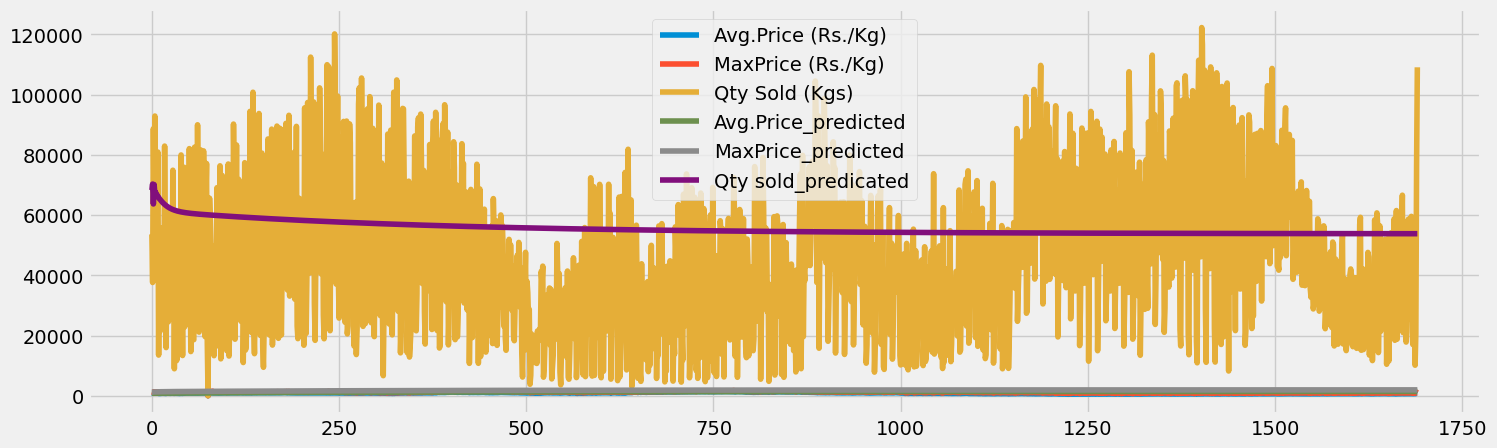

In [ ]:
test_vs_pred.plot(figsize=(16,5))

## **Multivariate LSTM**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Now get only the average price, quantities sold, date, Max price
df2=df2[['Date of Auction',  'Avg.Price (Rs./Kg)', 'Qty Sold (Kgs)', 'MaxPrice (Rs./Kg)']]
df2

,Date of Auction,Avg.Price (Rs./Kg),Qty Sold (Kgs),MaxPrice (Rs./Kg)
2014-11-07,2014-11-07,765.73,109076.0,958.0
2015-01-14,2015-01-14,861.93,76699.0,1130.0
2015-05-01,2015-05-01,680.56,10132.0,916.0
2015-05-01,2015-05-01,719.43,20623.0,928.0
2015-05-02,2015-05-02,655.47,27568.0,846.0
...,...,...,...,...
2024-10-14,2024-10-14,2283.15,103748.9,2966.0
2024-10-15,2024-10-15,2307.54,48852.8,2550.0
2024-10-15,2024-10-15,2271.60,41859.0,3236.0
2024-10-16,2024-10-16,2258.94,63937.9,2906.0


In [ ]:
df3 = df2.set_index('Date of Auction')
df3

,Avg.Price (Rs./Kg),Qty Sold (Kgs),MaxPrice (Rs./Kg)
Date of Auction,,,
2014-11-07,765.73,109076.0,958.0
2015-01-14,861.93,76699.0,1130.0
2015-05-01,680.56,10132.0,916.0
2015-05-01,719.43,20623.0,928.0
2015-05-02,655.47,27568.0,846.0
...,...,...,...
2024-10-14,2283.15,103748.9,2966.0
2024-10-15,2307.54,48852.8,2550.0
2024-10-15,2271.60,41859.0,3236.0


In [ ]:
#lets know more about our data
df3.shape

(4685, 3)

In [ ]:
df3.isnull().sum()

,0
Avg.Price (Rs./Kg),0
Qty Sold (Kgs),0
MaxPrice (Rs./Kg),0


In [ ]:
df3.describe()

,Avg.Price (Rs./Kg),Qty Sold (Kgs),MaxPrice (Rs./Kg)
count,4685.000000,4685.000000,4685.000000
mean,1310.674606,48744.486809,1771.458378
std,595.706994,24208.511473,746.377152
min,0.000000,0.000000,0.000000
25%,896.460000,29510.100000,1236.000000
50%,1099.090000,47558.300000,1504.000000
75%,1584.930000,64780.100000,2181.000000
max,2617.635000,117685.100000,3598.500000


In [ ]:
#convert dataframe to a numpy array
data_numpy=df3.values

In [ ]:
# get the number of rows to train the model on
training_data=math.ceil(len(data_numpy)*.8)
training_data

3748

In [ ]:
#Feature scaling
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data_numpy)
scaled_data

array([[0.29252742, 0.9268463 , 0.26622204],
       [0.32927815, 0.65173076, 0.31401973],
       [0.25999041, 0.08609416, 0.25455051],
       ...,
       [0.86780624, 0.35568649, 0.89926358],
       [0.86296982, 0.54329648, 0.80755871],
       [0.86861232, 0.61854899, 0.72947061]])

In [ ]:
# Create scaled training data
train_data=scaled_data[0:training_data, :]

In [ ]:
# Creating a data structure with 10 timesteps and 1 output
x_train=[]
y_train=[]

for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])
    if i<=12:
        print(x_train)
        print(y_train)
        print()

[array([0.29252742, 0.32927815, 0.25999041, 0.27483969, 0.25040542,
       0.26587358, 0.26060547, 0.25328207, 0.25564298, 0.26763854])]
[0.2611861470373066]

[array([0.29252742, 0.32927815, 0.25999041, 0.27483969, 0.25040542,
       0.26587358, 0.26060547, 0.25328207, 0.25564298, 0.26763854]), array([0.32927815, 0.25999041, 0.27483969, 0.25040542, 0.26587358,
       0.26060547, 0.25328207, 0.25564298, 0.26763854, 0.26118615])]
[0.2611861470373066, 0.2607621001400119]

[array([0.29252742, 0.32927815, 0.25999041, 0.27483969, 0.25040542,
       0.26587358, 0.26060547, 0.25328207, 0.25564298, 0.26763854]), array([0.32927815, 0.25999041, 0.27483969, 0.25040542, 0.26587358,
       0.26060547, 0.25328207, 0.25564298, 0.26763854, 0.26118615]), array([0.25999041, 0.27483969, 0.25040542, 0.26587358, 0.26060547,
       0.25328207, 0.25564298, 0.26763854, 0.26118615, 0.2607621 ])]
[0.2611861470373066, 0.2607621001400119, 0.2565827550441524]



In [ ]:
# To convert x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(3738, 10)

In [ ]:
# Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3738, 10, 1)

In [ ]:
# Build the lstm model
#Initialising the RNN
model=Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(30,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
#Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(30,return_sequences=True))
model.add(Dropout(0.2))
#Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
#Adding the output layer
model.add(Dense(1))
# Summarizing the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 30)              │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10, 50)              │          16,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,611 (185.98 KB)

 Trainable params: 47,611 (185.98 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the RNN model
model.fit(x_train,y_train,batch_size=8,epochs=10)

In [ ]:
# Model evaluation
scores = model.evaluate(x_train, y_train, verbose=0)
print(scores)

0.0009397718240506947


In [ ]:
#Create the testing dataset
test_data=scaled_data[training_data-10:,:]
#create data set x_test and y_test
x_test=[]
y_test=data_numpy[training_data:,:]
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])

In [ ]:
# Convert data into numpy array
x_test=np.array(x_test)

In [ ]:
# Reshape the test data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(937, 10, 1)

Get the models predicted prices
predictions=model.predict(x_test)
# Create empty table with 3 fields
trainPredict_dataset_like = np.zeros(shape=(407, 3) )
# Put the predicted values in the right field
trainPredict_dataset_like[:,0] = predictions[:,0]
# Inverse transform and then select the right field
# trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]

In [ ]:
# Get the models predicted prices
predictions = model.predict(x_test)
# Create empty table with 3 fields, matching the number of predictions
trainPredict_dataset_like = np.zeros(shape=(predictions.shape[0], 3))
# Put the predicted values in the right field
trainPredict_dataset_like[:,0] = predictions[:,0]
# Inverse transform and then select the right field
trainPredict = scaler.inverse_transform(trainPredict_dataset_like)[:,0]

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
train=df3[:training_data]
valid=df3[training_data:]
valid['predictions']=predictions

In [ ]:
# Show the valid and predicted prices
valid

,Avg.Price (Rs./Kg),Qty Sold (Kgs),MaxPrice (Rs./Kg),predictions
Date of Auction,,,,
2023-02-28,1483.49,60738.0,3598.5,0.580334
2023-02-28,1532.41,56047.4,3001.0,0.587728
2023-03-01,1500.33,51816.0,2461.0,0.596431
2023-03-01,1393.97,33344.0,2489.0,0.600387
2023-03-02,1520.71,67047.7,2560.0,0.604443
...,...,...,...,...
2024-10-14,2283.15,103748.9,2966.0,0.913352
2024-10-15,2307.54,48852.8,2550.0,0.912581
2024-10-15,2271.60,41859.0,3236.0,0.913561


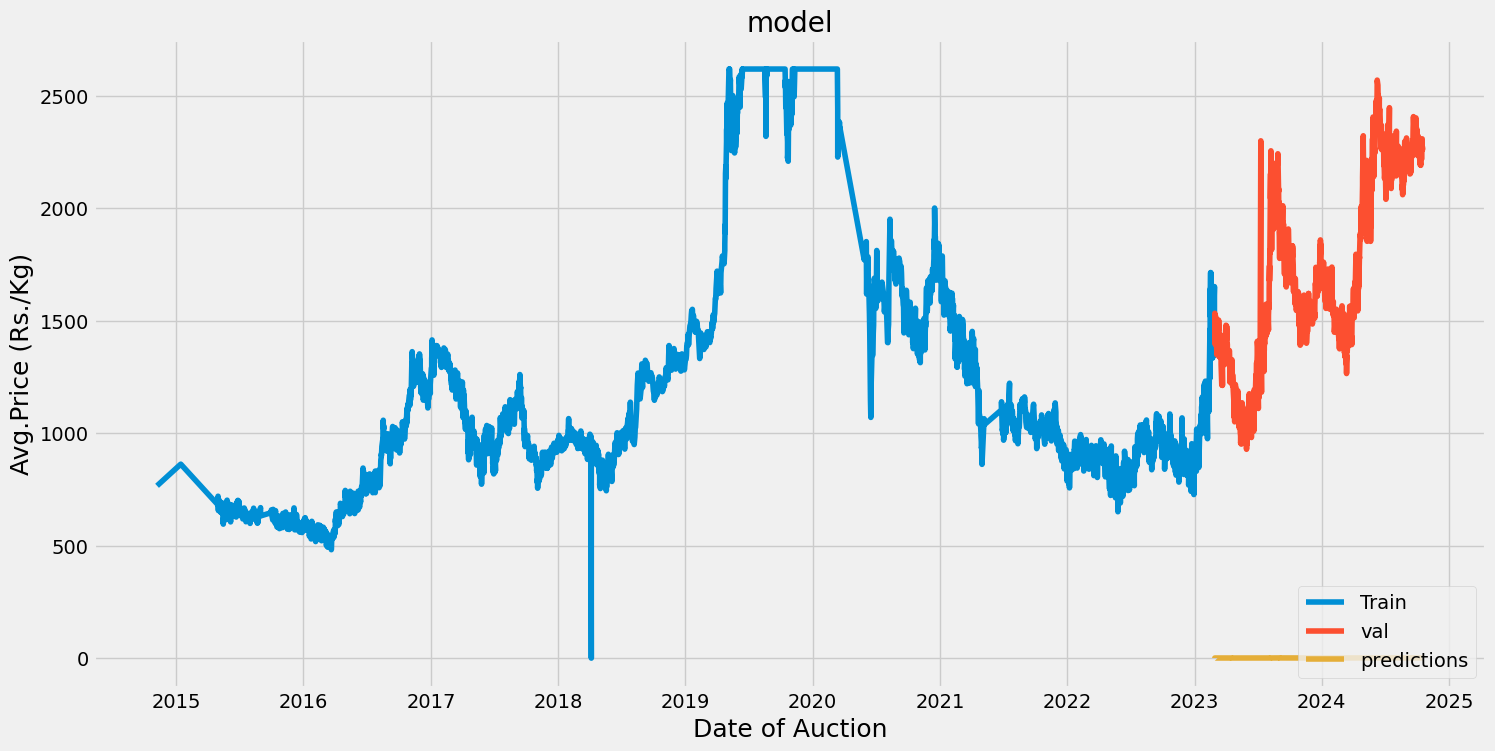

In [ ]:
#visualize the data: Avg.Price
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date of Auction',fontsize=18)
plt.ylabel('Avg.Price (Rs./Kg)',fontsize=18)
plt.plot(train['Avg.Price (Rs./Kg)'])
plt.plot(valid[['Avg.Price (Rs./Kg)','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

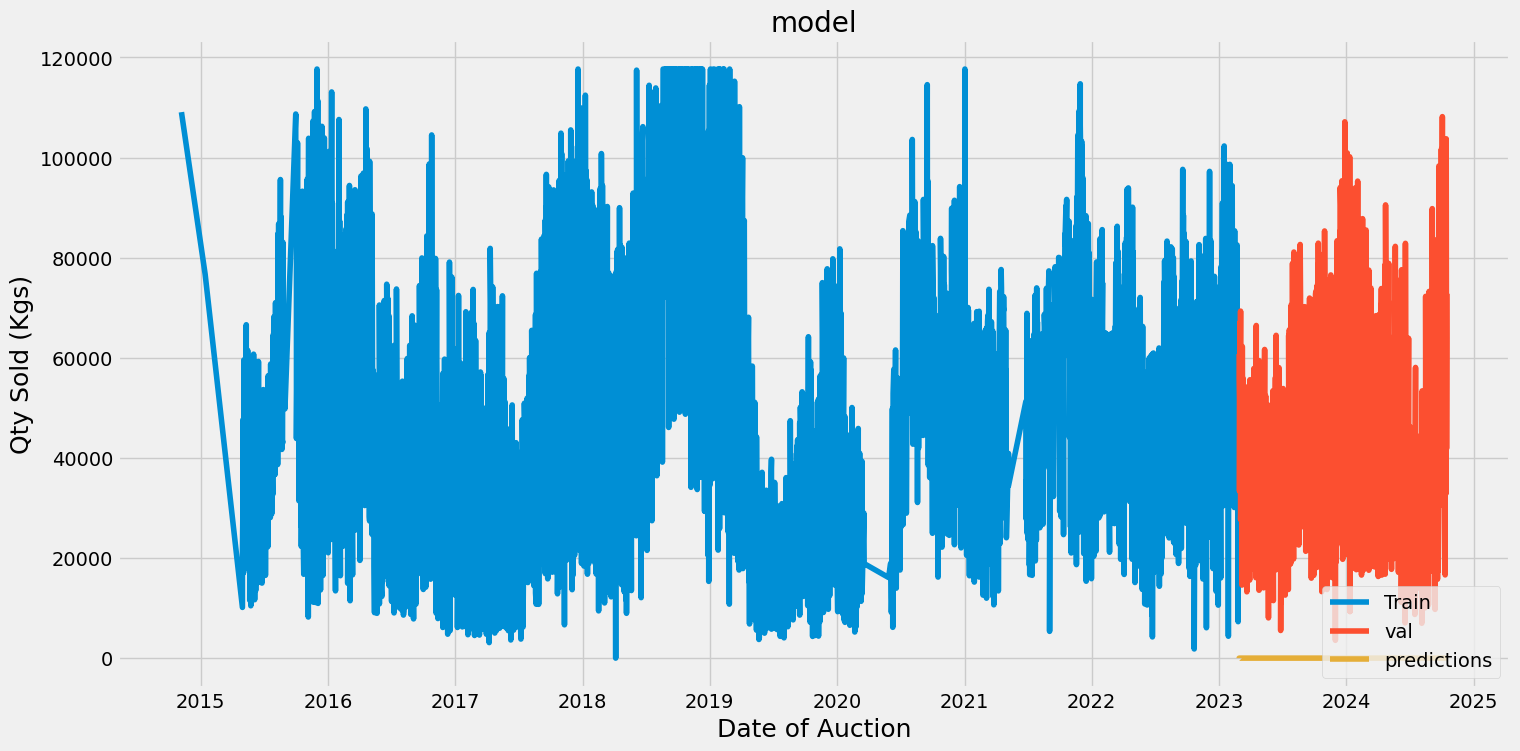

In [ ]:
#visualize the data: Qty Sold
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date of Auction',fontsize=18)
plt.ylabel('Qty Sold (Kgs)',fontsize=18)
plt.plot(train['Qty Sold (Kgs)'])
plt.plot(valid[['Qty Sold (Kgs)','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

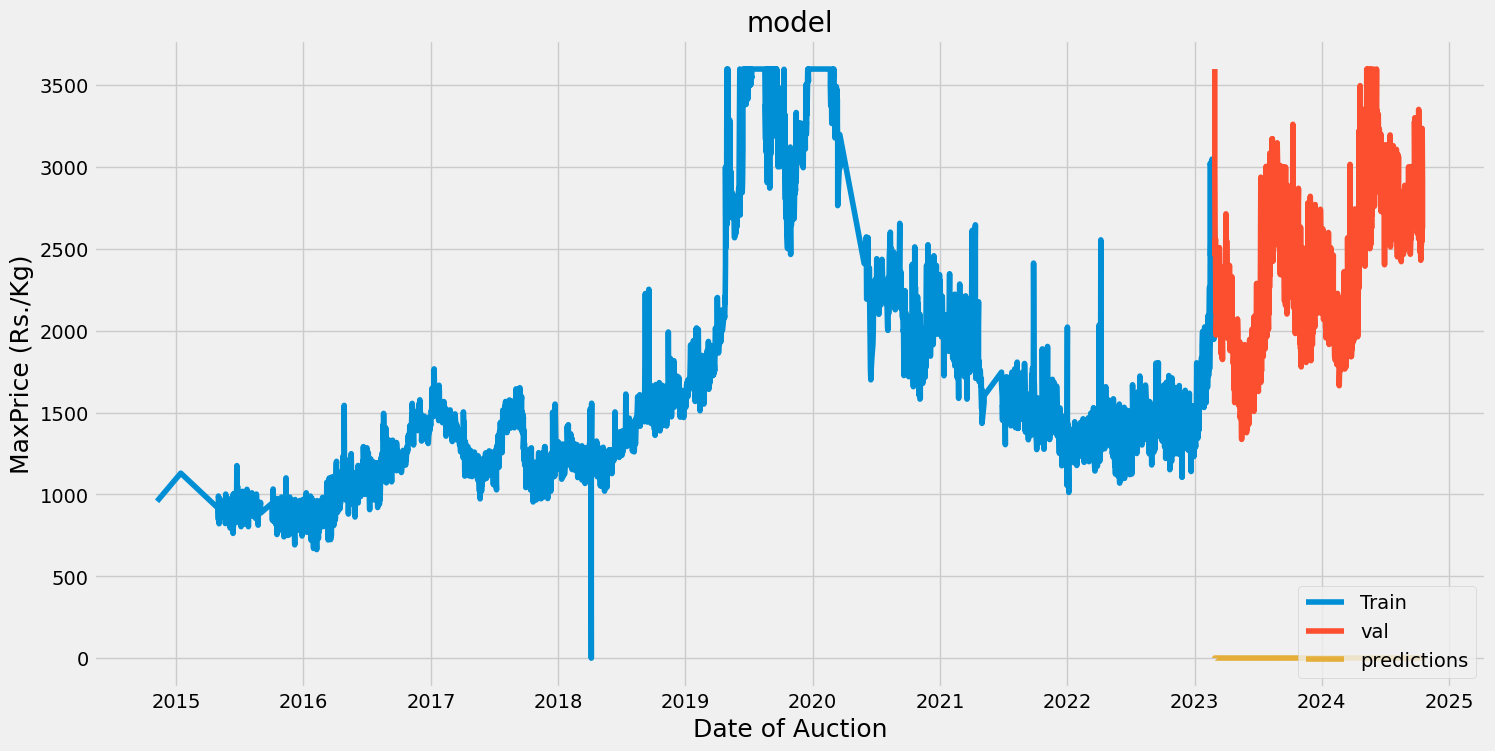

In [ ]:
#visualize the data: Maxprice
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date of Auction',fontsize=18)
plt.ylabel('MaxPrice (Rs./Kg)',fontsize=18)
plt.plot(train['MaxPrice (Rs./Kg)'])
plt.plot(valid[['MaxPrice (Rs./Kg)','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

### **Univariate LSTM**

In [ ]:
#now get only the average price
df2=df2[['Date of Auction', 'Avg.Price (Rs./Kg)']]
df2

,Date of Auction,Avg.Price (Rs./Kg)
2014-11-07,2014-11-07,765.73
2015-01-14,2015-01-14,861.93
2015-05-01,2015-05-01,680.56
2015-05-01,2015-05-01,719.43
2015-05-02,2015-05-02,655.47
...,...,...
2024-10-14,2024-10-14,2283.15
2024-10-15,2024-10-15,2307.54
2024-10-15,2024-10-15,2271.60
2024-10-16,2024-10-16,2258.94


In [ ]:
df3 = df2.set_index('Date of Auction')
df3
df3.shape
df3.size

4685

In [ ]:
df3.isnull().sum()

,0
Avg.Price (Rs./Kg),0


In [ ]:
df3.describe()

,Avg.Price (Rs./Kg)
count,4685.000000
mean,1310.674606
std,595.706994
min,0.000000
25%,896.460000
50%,1099.090000
75%,1584.930000
max,2617.635000


In [ ]:
#convert dataframe to a numpy array
data_numpy=df3.values

In [ ]:
# get the number of rows to train the model on
training_data=math.ceil(len(data_numpy)*.8)
training_data

3748

In [ ]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data_numpy)
scaled_data

array([[0.29252742],
       [0.32927815],
       [0.25999041],
       ...,
       [0.86780624],
       [0.86296982],
       [0.86861232]])

In [ ]:
#create scaled training data
train_data=scaled_data[0:training_data, :]

In [ ]:
#split the data into x and y train sets
x_train=[]
y_train=[]

for i in range(10,len(train_data)):
    x_train.append(train_data[i-10:i,0])
    y_train.append(train_data[i,0])
    if i<=12:
        print(x_train)
        print(y_train)
        print()

[array([0.29252742, 0.32927815, 0.25999041, 0.27483969, 0.25040542,
       0.26587358, 0.26060547, 0.25328207, 0.25564298, 0.26763854])]
[0.2611861470373066]

[array([0.29252742, 0.32927815, 0.25999041, 0.27483969, 0.25040542,
       0.26587358, 0.26060547, 0.25328207, 0.25564298, 0.26763854]), array([0.32927815, 0.25999041, 0.27483969, 0.25040542, 0.26587358,
       0.26060547, 0.25328207, 0.25564298, 0.26763854, 0.26118615])]
[0.2611861470373066, 0.2607621001400119]

[array([0.29252742, 0.32927815, 0.25999041, 0.27483969, 0.25040542,
       0.26587358, 0.26060547, 0.25328207, 0.25564298, 0.26763854]), array([0.32927815, 0.25999041, 0.27483969, 0.25040542, 0.26587358,
       0.26060547, 0.25328207, 0.25564298, 0.26763854, 0.26118615]), array([0.25999041, 0.27483969, 0.25040542, 0.26587358, 0.26060547,
       0.25328207, 0.25564298, 0.26763854, 0.26118615, 0.2607621 ])]
[0.2611861470373066, 0.2607621001400119, 0.2565827550441524]



In [ ]:
# To convert x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)
x_train.shape

(3738, 10)

In [ ]:
# Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(3738, 10, 1)

In [ ]:
# Build the lstm model
model=Sequential()
model.add(LSTM(30,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(30,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 10, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 10, 30)              │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 10, 50)              │          16,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,611 (185.98 KB)

 Trainable params: 47,611 (185.98 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train,y_train,batch_size=8,epochs=10)

In [ ]:
scores = model.evaluate(x_train, y_train, verbose=0)
print(scores)

In [ ]:
#create the testing dataset
test_data=scaled_data[training_data-10:,:]
#create data set x_test and y_test
x_test=[]
y_test=data_numpy[training_data:,:]
for i in range(10,len(test_data)):
    x_test.append(test_data[i-10:i,0])

In [ ]:
#convert data into numpy array
x_test=np.array(x_test)

In [ ]:
#reshape the test data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted prices
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
train=df3[:training_data]
valid=df3[training_data:]
valid['predictions']=predictions

In [ ]:
#show the valid and predicted prices
valid

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_data, test_data, and ARIMA_predict are defined and properly formatted
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train', color='blue')
plt.plot(test_data.index, test_data, label='Test', color='orange')
plt.plot(test_data.index, ARIMA_predict, label='ARIMA Predictions', color='purple')
plt.title('ARIMA Model Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()  # This is important to display the plot


# These are the predictions for multivariate data using Exponental Smoothing, Varmax, Multivariate LSTM, and Univariate LSTM.

